In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import nonlinear_QM_FPJPA as Fs
import wx_programs as wx
import bnc
from generator import *
from hardware_config import *
from values import *
from qubit_class import *
import standard_sequences.pinopi as pnp
import daq_programs_homo as daq
import standard_sequences.spectroscopy as spec
import standard_sequences.rabi as rabi
import analysis

In [2]:
wx_addr = wx.get_wx_address()
main_directory = r"C:\Users\quantum1\Documents"
save_dir = rf"{main_directory}\Python Scripts\Important Blue Fridge Python Files\New\nonlinear_QM\data"
ROIF1 = q1_dict["ro_freq"] - readout_dict["RO_LO"]
ROIF2 = q2_dict["ro_freq"] - readout_dict["RO_LO"]
target_bnc_address_6 = "USB0::0x03EB::0xAFFF::411-433500000-0753::INSTR"
bnc.set_bnc_output(
    general_vals_dict["qubit_bnc"], power_dBm=13, bnc_addr=target_bnc_address_6
)
q1 = Qubit(q1_dict)
q2 = Qubit(q2_dict)
readout = Readout(readout_dict)
type(readout.ro_dur)
IQ_angle_q1 = 240
IQ_angle_q2 = 220
num_steps = 3
reps = 10000
qubit_1_thr = [-5000, 5000]
qubit_2_thr = [-5000, 5000]
sweep_time = 500

In [3]:
pnp.pipi_pi_nopi(0, 0, q1, readout, general_vals_dict)
pnp.pipi_pi_nopi(1, 1, q1, readout, general_vals_dict)

writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 3
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
0, No error
0, No error
writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 3
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
0, No error
0, No error


0, No error
0, No error
0, No error
Patterns: 3
Records per pattern: 10000
Buffers per acquistion: 10
DAQ samples per pattern: 8192
0, No error
Capturing 10 buffers. Press <enter> to abort
Capture completed in 4.258344 sec
Captured 10 buffers (2.348331 buffers per sec)
Captured 30720 records (7214.071655 records per sec)
Transferred 503316480 bytes (118195350.000191 bytes per sec)


<Figure size 800x800 with 0 Axes>

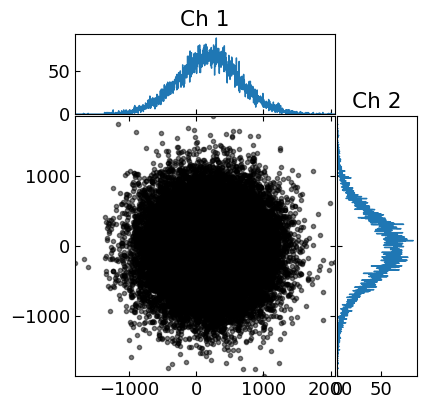

<Figure size 800x800 with 0 Axes>

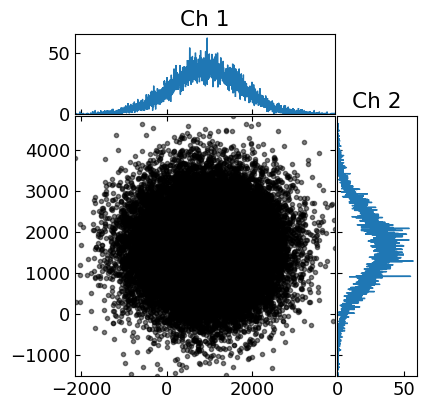

In [4]:
wx.wx_set_and_amplitude_and_offset(
    amp=general_vals_dict["wx_amps"], offset=general_vals_dict["wx_offs"]
)
(
    n_vs_pats_1,
    n_vs_pats_2,
    rec_avg_all,
    rec_all,
    rec_readout_1,
    rec_readout_2,
    rec_avg_vs_pats_1,
    rec_avg_vs_pats_2,
    rec_all_het_1,
    rec_all_het_2,
    bins_1,
    bins_2,
    counts_1,
    counts_2,
    prob_vs_pats_1,
    prob_vs_pats_2,
    n_readout_1,
    n_readout_2,
    rec_readout_vs_pats_1,
    rec_readout_vs_pats_2,
) = daq.run_daq_het_2q(
    ROIF1,
    ROIF2,
    deg_1=IQ_angle_q1,
    deg_2=IQ_angle_q2,
    num_patterns=num_steps,
    num_records_per_pattern=reps,
    ro_dur=readout.ro_dur,
    qubit_1_thr=qubit_1_thr,
    qubit_2_thr=qubit_2_thr,
    verbose=True,
)